In [216]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
%matplotlib inline

For this homework you will be using `pytorch` and `torchvision` library for neural networks and datasets. You can install them with `pip install torch torchvision`.

# Question 1 Principal Component Analysis
This problem will guide you through the principal component analysis. You will be using a classical dataset, the MNIST hand written digit dataset.

shapes: (60000, 28, 28) (60000,)
label: 5


/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


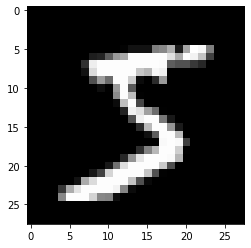

In [166]:
# Load the MNIST dataset
mnist = MNIST('.', download=True)
data = mnist.train_data.numpy()
labels = mnist.train_labels.numpy()
print('shapes:', data.shape, labels.shape)
plt.imshow(data[0], cmap='gray')
print('label:', labels[0])

## Question 1.1 Familiarize yourself with the data [5pt]
For this task, you will be using the torchvision package that provides the MNIST dataset. For each digit class(0-9), plot 1 image from the class and store those 10 images for each digit class in the array `digit_images`.

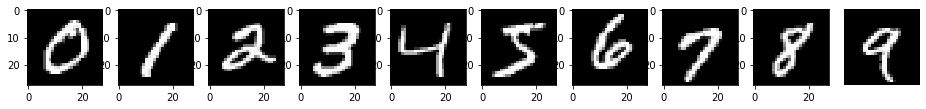

In [167]:
digit_count = np.ones((10)) * -1
digit_images = np.zeros([10, 28, 28])
### YOUR CODE HERE
for image, label in zip(data, labels):
    if np.sum(digit_count) < 10:
        if digit_count[label] == 1:
            continue
        else:
            digit_images[label] = image
            digit_count[label] = 1
    else:
        break
        
fig = plt.figure(figsize = (16, 16))

count = 1
rows, cols = 1, 10

for img in digit_images:
        fig.add_subplot(rows, cols, count)
        plt.imshow(img / 255, cmap='gray')
        count += 1
plt.axis('off')
plt.show()
### END OF CODE

## Question 1.2 PCA
The following questions will guide you through the PCA algorithm. 

### Question 1.2.1 Centering the data [5pt]
For each image, flatten it to a 1-D vector. To perform PCA on the dataset, we first move the data points so they have 0 mean on each dimension. Store the centered data in variable `data_centered` and the mean of each dimension in variable `data_mean`.

In [168]:
data_centered = None
data_mean = None
### YOUR CODE HERE
data = data.reshape(data.shape[0], 784)
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean
### END OF CODE

### Question 1.2.2 Compute the covariance matrix of the data [5pt]
You need to store the covariance matrix of the data in variable `data_covmat`. You may **not** use numpy.cov

In [169]:
data_covmat = None
### YOUR CODE HERE
data_covmat = (1 / data.shape[0]) * np.dot(data_centered.T, data_centered)
### END OF CODE

### Question 1.2.3 Compute the eigenvalues of the covariance matrix [5pt]
You need to store the eigenvalues of the covariance matrix in variable `covmat_eig`, sorted in descending order. Then you need to plot the eigenvalues with `plt.plot`. You can use any numpy function.

/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


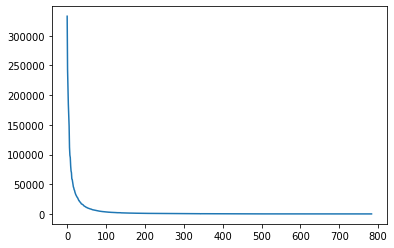

In [170]:
covmat_eig = None
### YOUR CODE HERE
values, vectors = np.linalg.eig(data_covmat)
plt.plot(values)
### END OF CODE

### Question 1.2.4 Project data onto the first 2 principal components [5pt]
Now you need to project the centered data on the 2D space formed by the eigenvectors corresponding to the 2 largest eigenvalues. Create a 2D scatter plot where you need to assign a unique color to each digit class. 

/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


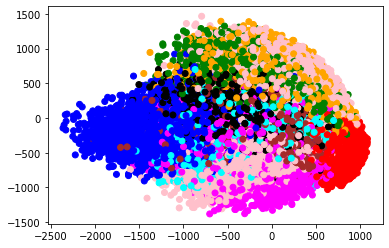

In [171]:
### YOUR CODE HERE
colors = ['blue', 'red', 'magenta', 'pink', 'green', 'cyan', 'black', 'pink', 'brown', 'orange']
colors_plot = [colors[label] for label in labels]
pca_proj = np.dot(data_centered, vectors[: , :2])
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], c=colors_plot)
### END OF CODE

### Question 1.2.5 Unproject data back to high dimensions [10pt]
For this question, you need to project the 10 images you plotted in **1.1** on the first 2 principal components, and then unproject the "compressed" 2-D representations back to the original space. Plot the "compressed" digit (the reconstructed digit). Do they look similar to the original images?

/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


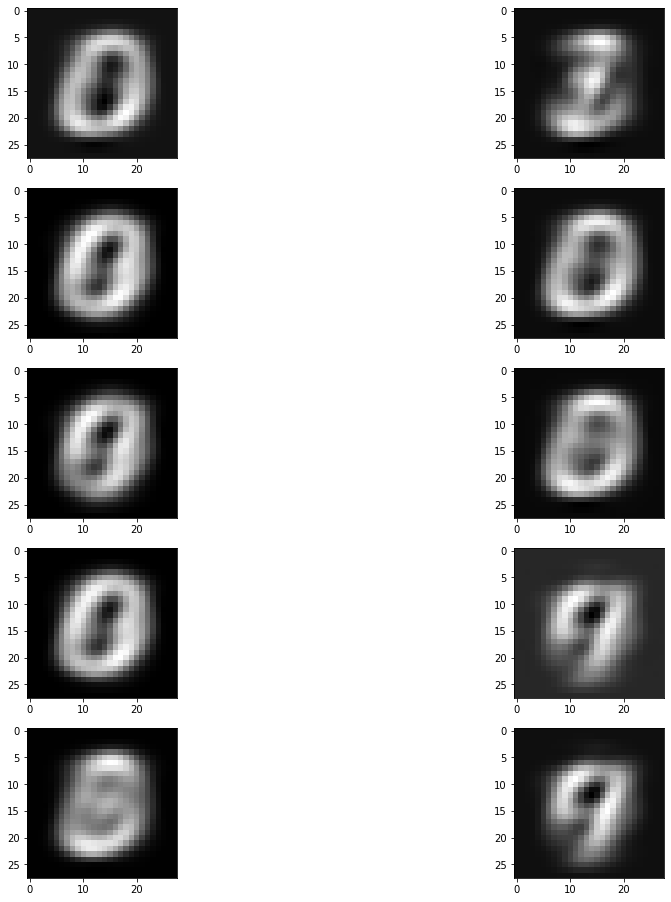

In [173]:
### YOUR CODE HERE
def project_imgs(imgs, k_dims):
    """
    imgs: (N x 28 x 28)
    k_dims: number of dimensions to project data onto
    """
    proj_imgs = np.dot(np.dot(imgs.reshape(-1, 784), vectors[:, :k_dims]), vectors[:, :k_dims].T)
    fig = plt.figure(figsize=(16, 16))
    rows, cols = 5, 2
    for idx, img in enumerate(proj_imgs):
        fig.add_subplot(rows, cols, idx + 1)
        plt.imshow((img.astype(float) + data_mean).reshape(28, 28) / 255, cmap='gray') # add back mean and reshape
    plt.show()

project_imgs(digit_images, 2)
### END OF CODE

### Question 1.2.6 Choose a better low dimension space. [5pt]
Do the previous problem with more dimensions (e.g. 3, 5, 10, 20, 50, 100). You only need to show results for one of them. Answer the following questinos. How many dimensions are required to represent the digits reasonably well? How are your results related to **question 1.2.3**?

/home/sniradi/Documents/ucsd/152/env_152/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


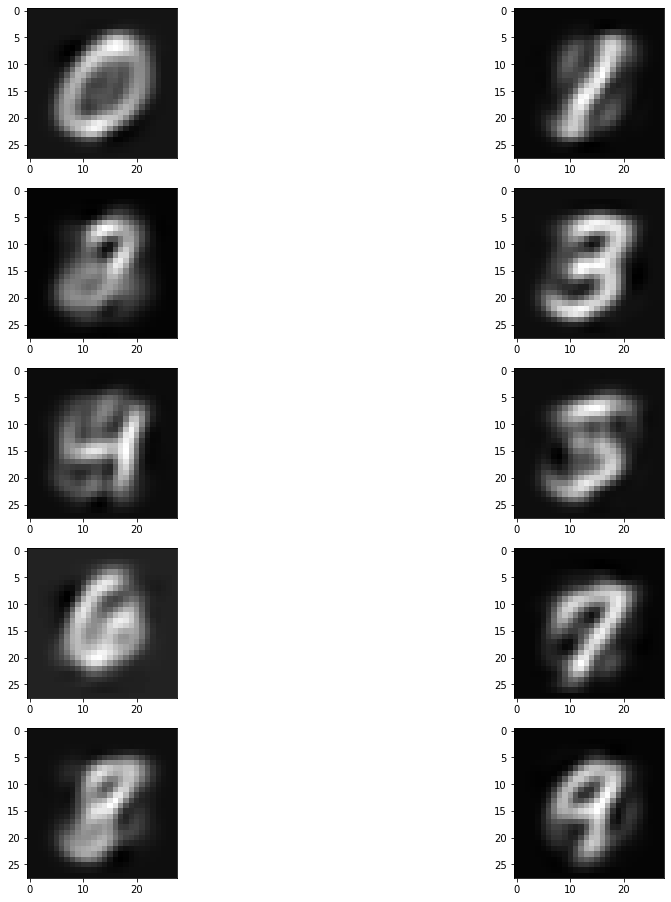

In [179]:
### YOUR CODE HERE
project_imgs(digit_images, 20)
### END OF CODE

<br>Depending on what reasonable is, you can represent the images with only 20 dimensions. The results are related to question 1.2.3 because each eigenvector in order of descending eigenvalues encodes less and less information about the images. In this regard, the eigenvectors relating to the higher magnitude eigenvalues contain more general information (closer to the mean) while each extra dimension adds another layer of data to the images.

## Question 1.3 Harris Corner and PCA [10pt]
Recall Harris corner detector algorithm:
1. Compute $x$ and $y$ derivatives ($I_x, I_y$) of an image
2. Compute products of derivatives ($I_x^2, I_y^2, I_{xy}$) at each pixel
3. Compute matrix $M$ at each pixel, where
$$
M(x_0,y_0) = \sum_{x,y} w(x-x_0,y-y_0)
    \begin{bmatrix}
        I_{x}^2 & I_{x}I_{y} \\
        I_{x}I_{y} & I_{y}^2
    \end{bmatrix}
$$
Here, we set weight $w(x,y)$ to be a box filter of size $3 \times 3$ (the box is placed centered at $(x_0, y_0)$).

In this problem, you need to show that Harris Corner detector is really just principal component analysis in the gradient space. Your explanation should answer the following quesions.
1. As we know, PCA is performed on data points. What are the data points in Harris corner detector when we think of it as a PCA?
2. What is the covariance matrix used in Harris corner detector and why it is a covariance matrix?
3. What are the principal components in Harris corner detector?
4. Briefly explain how principal components imply "cornerness".

(1) The data points in the Harris corner detector are the gradient values of the image in the horizontal and vertical directions. (2) The covariance matrix is used to find the components/directions with the most variance. (3) Because we are using the covariance matrix of the gradients, the principal components are directions with the highest variance. (4) The principal components imply "cornerness" because they represent the directions with the highest variance, thus, components with low magnitudes (small eigenvalues) will show little to no change in a direction, while ones with higher magnitudes show a large change in the direction. By projecting the data into 2 dimensions in the gradient space, we can see whether the data has "cornerness" through it's eigenvalues (aka magnitudes).

# Question 2 KNN, Softmax Regression

In [226]:
train_dataset = MNIST(root='.', train=True, transform=transforms.ToTensor, download=True)
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())
train_X = train_dataset.data.numpy()  # training data, uint8 type to reduce memory and comparison cost
train_y = train_dataset.targets.numpy()  # training label
test_X = test_dataset.data.numpy() # testing data, uint8 to reduce memory and comparison cost
test_y = test_dataset.targets.numpy()  # testing label

In [227]:
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

## Question 2.1 K-Nearest Neighbor [10pt]
In this problem you will be implementing the KNN classifier. Fill in the functions in the starter code below. You are are allowed to use `scipy.spatial.KDTree` and `scipy.stats.mode` (in case of a tie, pick any one). Please avoid `sklearn.neighbors.KDTree` as it appears extremely slow. You are **not** allowed to use a library KNN function that directly solves the problem.

If you do not know what a KD-tree is, please read the documentation for `scipy.spatial.KDTree` to understand how you can use it.

Note: if you run into memory issues or neighbor queries run for more than 10 minutes, you are allowed to reduce the data size, and explain what you have done to the training data.

In [228]:
from scipy.spatial import KDTree
from scipy.stats import mode

In [247]:
class KNNClassifier:
    def __init__(self, num_neighbors):
        """
        construct the classifier
        Args:
            num_centers: number of neighbors
        """
        ### YOU CODE HERE
        self.k = num_neighbors
        self.kdt = None
        ### END OF CODE
    
    def fit(self, X, y):
        """
        train KNN classifier
        Args:
            X: training data, numpy array with shape (Nxk) where N is number of data points, k is number of features
            y: training labels, numpy array with shape (N)
        """
        ### YOU CODE HERE
        self.kdt = KDTree(X)
        self.X = X
        self.y = y
        ### END OF CODE
        return self
        
    def predict(self, X):
        """
        predict labels
        Args:
            X: testing data, numpy array with shape (Mxk) where M is number of data points, k is number of features
        Return:
            y: predicted labels, numpy array with shape (N)
        """
        pred = np.zeros((len(X)))
        ### YOU CODE HERE
        dists, inds = self.kdt.query(X, self.k)
        for idx, n_ind in enumerate(inds):
            neighbors = np.array([self.y[i] for i in n_ind])
            unique, counts = np.unique(neighbors, return_counts=True)
            pred[idx] = np.asarray((unique, counts)).T[0][0]
        ### END OF CODE
        return pred

In [249]:
from sklearn.metrics import accuracy_score
knn= KNNClassifier(3).fit(train_X, train_y)
pred_y = knn.predict(test_X)
print('KNN accuracy:', accuracy_score(test_y, pred_y))

KNN accuracy: 0.4858


## Question 2.2 Softmax Regression
In this problm, you will be implementing the softmax regression(multi-class logistic regression). Here is a brief recap of several important concepts. In the following explanation, I will use $x$ for data vector, $y'$ for ground truth label, and $y$ for predicted label.

Suppose we have a problem where we need to classify data points into $m$ classes. 

1. Softmax function $S$ normalize a vector to have sum 1. (it turns any vector into a probability distribution)
$$S(x) = [\frac{e^{x_1}}{\sum_{j=1}^m{e^{x_j}}}, \frac{e^{x_2}}{\sum_{j=1}^m{e^{x_j}}},...,\frac{e^{x_m}}{\sum_{j=1}^m{e^{x_j}}}]$$

2. Cross entropy loss $J$ is the multiclass logistic regression loss.
$$J(y', y)=-\sum_{i=1}^m y_i'\log{y_i}$$ where $y'$ is the one-hot ground truth label and $y$ is the predicted label distribution.

3. Softmax regression is the following optimization problem.
$$\min_{W,b} \sum_{(X,y')\in \text{\{training set\}}}J(y',S(Wx+b))$$
where $W$ has shape $(m \times k)$ where $k$ is the number of features in a data point; $b$ is a $m$ dimensional vector.

4. This objective is optimized with gradient descent. Let
$$L = \sum_{(x,y')\in \text{\{training set\}}}J(y',S(Wx+b))$$
Update $W$ and $b$ with $\frac{\partial L}{\partial W}$ and $\frac{\partial L}{\partial b}$.

### Question 2.2.1 Compute the gradients [10pt]
In this question, you need to do the following:
1. Compute the gradient $\frac{\partial J}{\partial y}$. i.e. compute $$\frac{\partial J}{\partial y_i}$$
Express it in terms of $y_i'$ and $y_i$.
2. Let $u=Wx+b$, $y_i=S_i(u_j)$ Compute $$\frac{\partial y_i}{\partial u_j}$$ Express it in terms of $y_i, y_j$ and $\delta_{ij}$, where 
$$\delta_{ij}=\begin{cases}1 & i=j \\ 0 & i\neq j\end{cases}$$
3. Compute $$\frac{\partial J}{\partial W_{jk}} \text{ and } \frac{\partial J}{\partial b_j}$$
Express them in terms of $y_j, y_j', x_k$. Explain your results in an intuitive way. Hint: the results should have a very simple form that makes sense intuitively.
4. Compute $$\frac{\partial J}{\partial W}$$ in the matrix form. It should be a matrix with the same shape as $W$, and entry $jk$ is $\frac{\partial J}{\partial W_{jk}}$. Similarly, compute $$\frac{\partial J}{\partial b}$$

1. 
    $$\frac{\partial J}{\partial y} = -\sum y'_i \frac{\partial \log{y_i}}{\partial y_i}$$ 
    $$ = - \sum \frac{y_i'}{y_i}$$
<br></br>
<br></br>
2. 
Because y is a one hot encoded vector, we need to account for two cases: $ i = j \text { and } i \neq j $
<br></br>
 Let $$\sum e^{u_d} = \sum_{d=1}^D e^{u_d}$$ where d = 1 ... num_classes
<br></br> 
Case 1: $i = j$ 
<br></br> 
$$ \frac{\partial y_i}{\partial u_j} = \frac{e^{u_i} \sum e^{u_d} - e^{u_j}e^{u_i}}{(\sum e^{u_d})^2} = \frac{e^{u_i}}{\sum e^{u_d}} \frac{(\sum e^{u_d}) - e^{u_i}}{\sum e^{u_d}} = y_i (1 - \frac{e^{u_i}}{\sum e^{u_d}}) = y_i(1 - y_j) $$
<br></br> 
Case 2: $i \neq j$: 
<br></br> 
$$ \frac{\partial y_i}{\partial u_j} = \frac{\partial \frac{e^{u_j}}{\sum e^{u_d}}}{\partial u_j} = \frac{0 - e^{u_j}e^{u_j}}{\sum e^{u_d}} = -\frac{e^{u_j}}{\sum e^{u_d}} \frac{e^{u_j}}{\sum e^{u_d}} = -y_i y_j $$
Thus, 
$$\frac{\partial y_i}{\partial u_j} = y_i(\delta_{ij} - y_j)$$
<br></br> 
<br></br>
3. 
    $$\frac{\partial u_k}{\partial W_jk} = x$$
    $$\frac{\partial u_k}{\partial b_j} = 1$$
By chain rule, $$\frac{\partial J}{\partial W_{jk}} = \frac{\partial J}{\partial y_j}\frac{\partial y_j}{\partial u_k} \frac{\partial u_k}{\partial W_jk}$$
    $$ = - \sum \frac{y_i'}{y_i} \frac{\partial y_i}{\partial u_j} $$
    And then using the partial derivative from (2) we can substitute to get a clean derivative for cross-entropy.
    $$ = (-y_i(1 - y_i') - \sum \frac{y_i}{y_i'}{-y_j * p_i}) * x $$
    $$ = (-y_i + y_i * y_i' + \sum y_j * y_i') * x $$
    $$ = (y_i - y_i') * x_k$$
Similarly, 
$$\frac{\partial J}{\partial b_j} = (y_i - y_i')$$
<br></br> 
<br></br>
4. 
    $$\frac{\partial J}{\partial W} = (y - y') * x$$
    $$\frac{\partial J}{\partial b} = (y - y')$$

### Question 2.2.2 Stochastic Gradient Descent [10pt]
In gradient descent algorithm, we update $W$ and $b$ with $\partial L / \partial W$ and $\partial L / \partial b$. However, this requires the gradient w.r.t. the whole dataset. Computing such gradient is very slow. Instead, we can update the weights with per-data gradient. This is known as the SGD algorithm, which runs much faster. You need to take the following steps.
1. Implement softmax function $S$. We need to take special care in this function since $e^x$ tends to overflow easily. However, we observe that $S(x) = S(x-m)$ for any constant vector $m$. We can stabilize softmax using $S(x) = S(x-\max(x))$.
2. Implement function `J`(loss) and `dJ`(loss gradient). Note: `J` is not required to run the algorithm, but you may want to implement it for debug purposes.
3. Implement the SGD algorithm.
4. Run the algorithm for 20 epochs (each epoch iterates the whole data set once) with learning rate `1e-3` and report accuracy on test set. You may use `sklearn.metrics.accuracy_score`. You need to achieve accuracy > 90%. You are allowed to experiment with different epoch numbers and learning rates (even learning rate decay) to achieve this accuracy, but they are not required.

You may use print (or progress bar packages) to track the training progress since it might take several minutes.

In [207]:
train_dataset = MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())
train_X = train_dataset.data.numpy() / 255.  # normalize data to 0-1
train_y = train_dataset.targets.numpy()  # training label
test_X = test_dataset.data.numpy() / 255.  # normalize data to 0-1
test_y = test_dataset.targets.numpy()  # testing label
train_X = train_X.reshape((train_X.shape[0], -1))  # flatten the image
test_X = test_X.reshape((test_X.shape[0], -1))  # flatten the image

In [215]:
def softmax(x):
    """
    softmax function
    Args:
        x: a 1-d numpy array
    Return:
        results of softmax(x)
    """
    ### YOUR CODE HERE
    e = np.exp(x - np.max(x))
    return e/np.sum(e)
    ### END OF CODE
    
def J(W, b, y_true, x):
    """
    Softmax Loss function
    Args:
        W: weights (num_classes x num_features)
        b: bias (num_classes)
        y_true: ground truth 1-hot label (num_classes)
        x: input data
    Return:
        J(y', y)
    """
    ### YOUR CODE HERE
    z = np.dot(x, W.T) + b
    y_p = softmax(z)
    return np.sum(-y_p * np.log(z))
    ### END OF CODE

def dJ(W, b, y_true, x):
    """
    Softmax Loss gradient
    Args:
        W: weights (num_classes x num_features)
        b: bias (num_features)
        y_true: ground truth 1-hot label (num_classes)
        x: input data (num_features)
    Return:
        (dW, db): gradient w.r.t. W and b
    """
    
    dW = None
    db = None
    
    ### YOUR CODE HERE
    logits = np.dot(x, W.T) + b
    y_pred = softmax(logits)
    dJ = y_pred - y_true.astype(float).reshape(1, -1)
    dW = x.astype(float).reshape(-1, 1) @ dJ
    db = y_pred - y_true
    return dW.T, db
    ### END OF CODE

In [209]:
from tqdm.notebook import tqdm_notebook

In [212]:
def SGD(f, df, Xs, ys, n_classes=10, lr=1e-3, max_epoch=20):
    """
    Args:
        f: function to optimize
        df: the gradient of the function
        Xs: input data, numpy array with shape (num_data x num_features)
        ys: true label, numpy array with shape (num_data x num_classes)
        lr: learning rate
        max_epoch: maximum epochs to run SGD
    Return:
        optimal weights and biases
    """
    N, m = Xs.shape
    W = np.random.rand(n_classes, m) - 0.5  # you do not need to change random initialization
    b = np.random.rand(n_classes) - 0.5

    ### YOUR CODE HERE
#     for epoch in tqdm_notebook(range(max_epoch)):
    for epoch in range(max_epoch):
        for X, y in zip(Xs, ys):
            dW, db = dJ(W, b, y, X)
            W -= lr * dW.astype(float)
            b -= lr * db.astype(float)
#             print(J(W, b, y, X))
    ### END OF CODE
    return W, b

In [213]:
train_y_onehot = np.zeros((train_y.shape[0], 10))
train_y_onehot[np.arange(len(train_y)), train_y] = 1
W, b = SGD(J, dJ, train_X, train_y_onehot, 10, max_epoch=20)
accuracy_score(test_y, np.argmax(test_X @ W.T + b, axis=1))

0.9191

# Question 3 Convolutional Neural Networks
This question requires you to use the PyTorch framework for neural network training. You will not need GPU to train the networks for this problem.

The following is a code sample for training a simple multi-layer perceptron neural network using PyTorch. Running it should give you about 98% testing accuracy.

Since network training takes long, I recommend installing the tqdm package for progress tracking.

In [187]:
from tqdm.notebook import tqdm_notebook

In [196]:
train_dataset = MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = MNIST('.', train=False, transform=transforms.ToTensor())

In [197]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        """init function builds the required layers"""
        super(MLP, self).__init__()  # This line is always required
        # Hidden layer
        self.layer1 = nn.Linear(input_size, hidden_size)
        # activation
        self.relu = nn.ReLU()
        # output layer
        self.layer2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        """forward function describes how input tensor is transformed to output tensor"""
        # flatten the input from (Nx1x28x28) to (Nx784)
        torch.flatten(x, 1)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        # Note we do not need softmax layer, since this layer is included in the CrossEntropyLoss provided by torch
        return x

In [198]:
model = MLP(784, 1024, 10)
model

MLP(
  (layer1): Linear(in_features=784, out_features=1024, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=1024, out_features=10, bias=True)
)

In [199]:
opts = {
    'lr': 5e-4,
    'epochs': 5,
    'batch_size': 64
}

In [200]:
optimizer = torch.optim.Adam(model.parameters(), opts['lr'])  # Adam is a much better optimizer compared to SGD
criterion = torch.nn.CrossEntropyLoss()  # loss function
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=opts['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=opts['batch_size'], shuffle=True)

In [202]:
for epoch in range(opts['epochs']):
    train_loss = []
#     for i, (data, labels) in tqdm_notebook(enumerate(train_loader), total=len(train_loader)):
    for i, (data, labels) in enumerate(train_loader):
        # reshape data
        data = data.reshape([-1, 784])
        # pass data through network
        outputs = model(data)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()  # Important! Otherwise the optimizer will accumulate gradients from previous runs!
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    test_loss = []
    test_accuracy = []
    for i, (data, labels) in enumerate(test_loader):
        # reshape data
        data = data.reshape([-1, 784])
        # pass data through network
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        test_loss.append(loss.item())
        test_accuracy.append((predicted == labels).sum().item() / predicted.size(0))
    print('epoch: {}, train loss: {}, test loss: {}, test accuracy: {}'.format(epoch, np.mean(train_loss), np.mean(test_loss), np.mean(test_accuracy)))

epoch: 0, train loss: 0.2871312479426993, test loss: 0.15535093087014878, test accuracy: 0.95203025477707
epoch: 1, train loss: 0.11385923393193816, test loss: 0.09600958302854352, test accuracy: 0.9705414012738853
epoch: 2, train loss: 0.07441152635016549, test loss: 0.07613756404418474, test accuracy: 0.9764132165605095
epoch: 3, train loss: 0.05186360219676198, test loss: 0.07071893088145857, test accuracy: 0.9791998407643312
epoch: 4, train loss: 0.03870428692195008, test loss: 0.06497625322051488, test accuracy: 0.979796974522293


## Question 3.1 Implementing CNN [15pt]
You need to implement a convolutional neural network for the same task as above. You may find the PyTorch documentation helpful. https://pytorch.org/docs/stable/nn.html

We provide a working network structure below. You can adjust the network size and training options for better performance, but a correct implementation of the provided network should give you the required accuracy. For convolutional layers, (conv MxM, N) means the layer has kernel size $M$ by $M$ and $N$ output channels; for pooling layers, (maxpool MxM) means doing max pooling with kernel size $M$ by $M$.

(conv 5x5, 32) -> (relu) -> (maxpool 2x2) -> (conv 5x5, 64) -> (relu) -> (maxpool 2x2) -> (flatten) -> (linear 10) -> (output)

For full score, you need to achieve 99% testing accuracy. Also, plot the hand-written digits that your network got wrong.

In [182]:
from torch.nn import Conv2d, MaxPool2d, ReLU, Linear, Flatten
class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        init convolution and activation layers
        Args:
            input_size: (1,28,28)
            num_classes: 10
        """
        super(CNN, self).__init__() 
        ### YOUR CODE HERE
        self.conv_1 = Conv2d(input_size[0], 32, 5)
        self.relu = ReLU()
        self.maxpool = MaxPool2d(2)
        self.conv_2 = Conv2d(32, 64, 5)
        self.flatten = Flatten()
        self.linear = Linear(1024, num_classes)        
        ### END OF CODE
        
    
    def forward(self, x):
        """
        forward function describes how input tensor is transformed to output tensor
        Args:
            x: (Nx1x28x28) tensor
        """
        ### YOUR CODE HERE
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.linear(x)
        ### END OF CODE
        return x

In [183]:
model = CNN((1, 28, 28), 10)
model

CNN(
  (conv_1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten()
  (linear): Linear(in_features=1024, out_features=10, bias=True)
)

In [192]:
### You may (and should) change these
opts = {
    'lr': 1e-3,
    'epochs': 5,
    'batch_size': 128
}

### if you cannot get 99% with SGD, Adam optimizer can help you
optimizer = torch.optim.Adam(model.parameters(), opts['lr'])

In [185]:
criterion = torch.nn.CrossEntropyLoss()  # loss function
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=opts['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=opts['batch_size'], shuffle=True)

In [193]:
for epoch in range(opts['epochs']):
    train_loss = []
    for i, (data, labels) in enumerate(train_loader):
#     for i, (data, labels) in tqdm_notebook(enumerate(train_loader), total=len(train_loader)):
        # pass data through network
        outputs = model(data)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
    test_loss = []
    test_accuracy = []
    for i, (data, labels) in enumerate(test_loader):
        # pass data through network
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        test_loss.append(loss.item())
        test_accuracy.append((predicted == labels).sum().item() / predicted.size(0))
    print('epoch: {}, train loss: {}, test loss: {}, test accuracy: {}'.format(epoch, np.mean(train_loss), np.mean(test_loss), np.mean(test_accuracy)))

epoch: 0, train loss: 0.013442807034579422, test loss: 0.025250980340952314, test accuracy: 0.992879746835443
epoch: 1, train loss: 0.009759442139843127, test loss: 0.026507562503831673, test accuracy: 0.9915941455696202
epoch: 2, train loss: 0.00807135027462752, test loss: 0.027790452662377937, test accuracy: 0.9919897151898734
epoch: 3, train loss: 0.007392926421061445, test loss: 0.02917059443399599, test accuracy: 0.9912974683544303
epoch: 4, train loss: 0.006107363599067209, test loss: 0.0277518869975038, test accuracy: 0.9911985759493671


**Don't forget plotting the digits that the network got wrong.**

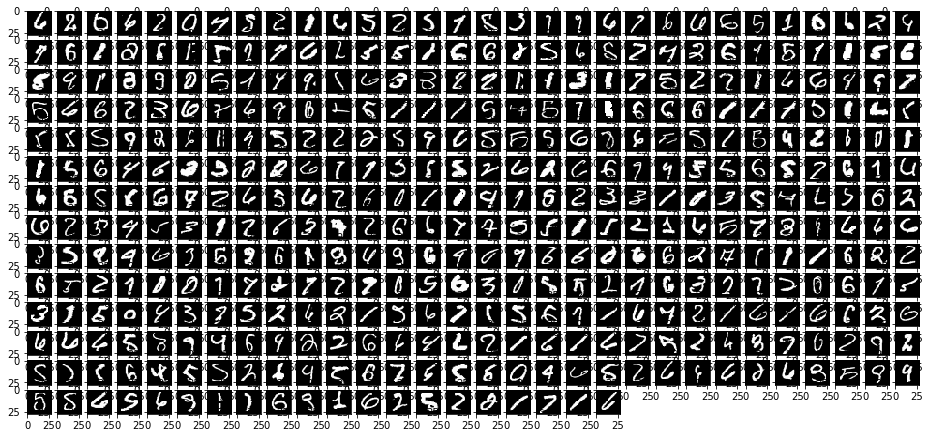

In [580]:
train_data = train_dataset.data.unsqueeze(1).float() # N x C x H x W
train_labels = train_dataset.targets

preds = torch.argmax(model(train_data), dim=1)
fig = plt.figure(figsize=(16, 16))
wrong = train_data[train_labels != preds]
rows, cols = 30, 30
for idx, img in enumerate(wrong):
    fig.add_subplot(rows, cols, idx + 1)
    plt.imshow(img.squeeze(), cmap='gray')

## Question 3.2 Kernel weights visualization [5pt]
For this question, you need to visualize the kernel weights for your first convolutional layer. Suppose you have 5x5 kernels with 32 output channels. You will plot 32 5x5 images.

hint: You might need to look at PyTorch documentation (or play with the PyTorch model) to figure out how to get the weights.

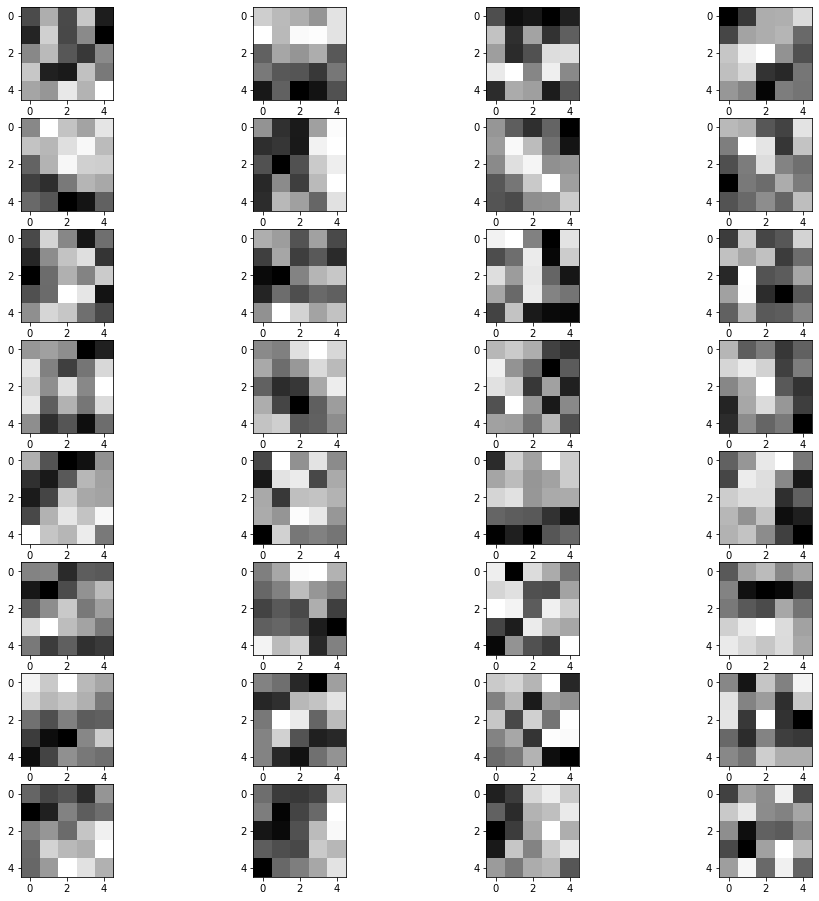

In [525]:
### YOUR CODE HERE
fig = plt.figure(figsize=(16, 16))
rows, cols = (8, 4)
for idx, kernel in enumerate(model.conv_1.weight.detach().numpy()):
    fig.add_subplot(rows, cols, idx + 1)
    plt.imshow(kernel.squeeze(), cmap='gray')
### END OF CODE